In [39]:
import numpy as np
import pandas as pd
import os
import seaborn as sns

In [40]:
train_data = pd.read_csv('./Data/train.csv')
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [41]:
test_data = pd.read_csv("./Data/test.csv")
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

#### Unique identifier (Id) is often removed from the dataset when creating features because it typically does not carry meaningful or predictive information about the target variable.

In [42]:
column_name = 'Id'
train_data = train_data.drop(column_name, axis=1)
test_data = test_data.drop(column_name, axis=1)

#### MSSubClass is a categorical variable providing the dwelling of sales.

In [43]:
print("Number of null values in Train Data is", train_data.MSSubClass.isnull().sum())
print("Number of null values in Test Data is", test_data.MSSubClass.isnull().sum())

Number of null values in Train Data is 0
Number of null values in Test Data is 0


<Axes: xlabel='MSSubClass', ylabel='SalePrice'>

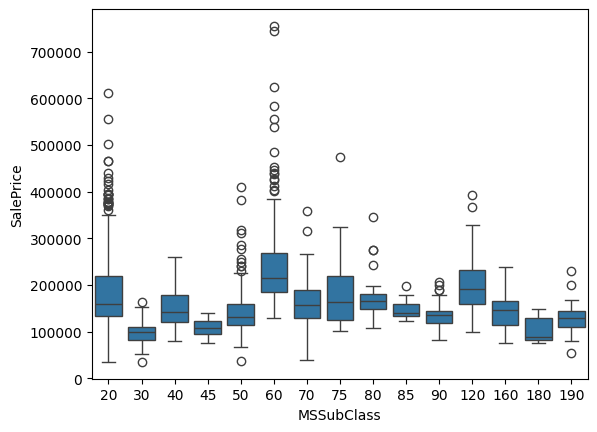

In [44]:
sns.boxplot(data=train_data, x='MSSubClass', y='SalePrice')

#### MSZoning is a is a categorical variable providing general zoning classification of the sale

In [45]:
print("Number of null values in Train Data is", train_data.MSZoning.isnull().sum())
print("Number of null values in Test Data is", test_data.MSZoning.isnull().sum())

Number of null values in Train Data is 0
Number of null values in Test Data is 4


In [46]:
train_data.MSZoning

0       RL
1       RL
2       RL
3       RL
4       RL
        ..
1455    RL
1456    RL
1457    RL
1458    RL
1459    RL
Name: MSZoning, Length: 1460, dtype: object

From the list, zoning categories with varying implications.
- Agriculture (A) might be the least valuable in a property sale context.
- Residential High Density (RH) could be more valuable than Residential Low Density (RL).
- Commercial (C) and Industrial (I) might have higher value than residential zones.

Assign rankings from 1 (lowest) to 7 (highest), based on the perceived value or importance of each zoning type.
- A (Agriculture): 1
- C (Commercial): 6
- FV (Floating Village Residential): 3
- I (Industrial): 5
- RH (Residential High Density): 7
- RL (Residential Low Density): 4
- RP (Residential Low Density Park): 2
- RM (Residential Medium Density): 4


In [47]:
zoning_map = {
    'A': 1,
    'C': 6,
    'FV': 3,
    'I': 5,
    'RH': 7,
    'RL': 4,
    'RP': 2,
    'RM': 4
}

train_data['MSZoning'] = train_data['MSZoning'].map(zoning_map)
test_data['MSZoning'] = test_data['MSZoning'].map(zoning_map)

<Axes: xlabel='MSZoning', ylabel='SalePrice'>

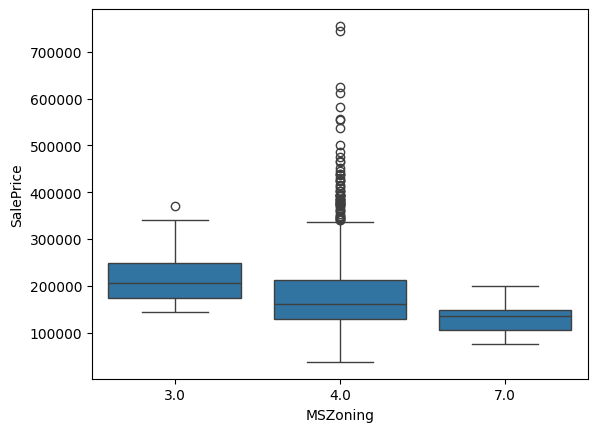

In [48]:
sns.boxplot(data=train_data, x='MSZoning', y='SalePrice')

#### LotFrontages

In [49]:
print("Number of null values in Train Data is", train_data.LotFrontage.isnull().sum())
print("Number of null values in Test Data is", test_data.LotFrontage.isnull().sum())

Number of null values in Train Data is 259
Number of null values in Test Data is 227


#### LotArea

In [50]:
print("Number of null values in Train Data is", train_data.LotArea.isnull().sum())
print("Number of null values in Test Data is", test_data.LotArea.isnull().sum())

Number of null values in Train Data is 0
Number of null values in Test Data is 0


<Axes: xlabel='LotArea', ylabel='SalePrice'>

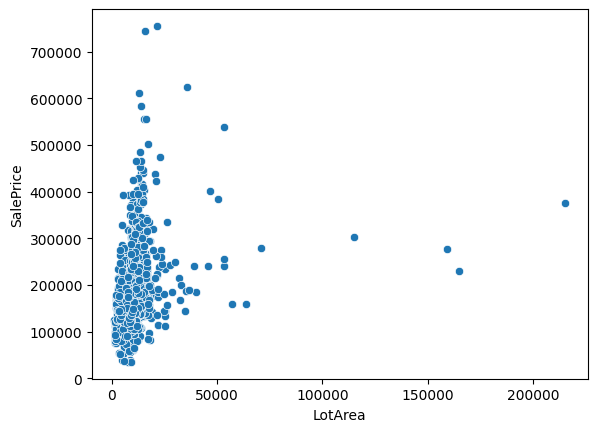

In [53]:
sns.scatterplot(train_data, x='LotArea', y='SalePrice')